<center>
<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="150">
</p>

# Curso *Introducción a la Ciencia de Datos y sus Metodologías*

### Proyecto 2. *Manejo de bases de datos en MySQL*

#### Osiris Alejandro Izaguirre
<p>
<img src="https://identidadbuho.unison.mx/wp-content/uploads/2019/06/letragrama-cmyk-72.jpg" width="150">
</p>

</center>

# Objetivos

Como proyecto final de la materia en *Introducción a la Ciencia de Datos y sus Metodologías* se plantea el reato de implementar el conocimiento en manejadores de Bases de Datos como `MySQL` adquirido en la clase. Para esto se utilizarán los datos de Spotify de *Taylor Swift* en formato `.csv` descargados de [Kaggle](https://www.kaggle.com/datasets/arthurboari/taylor-swift-spotify-data?resource=download) utilizando Python. 

El script para la creación de la Base de Datos en MySQL, así como su respectivas tablas, vistas, procedimientos almacenados y funciones esta disponible en mi repositorio de [GITHUB](https://github.com/osirisizs/Introduccion-a-la-Ciencia-de-Datos) personal. 

# Instalando librerías

Se instalaran e importaran las librerías y dependencias necesarias para nuestro código.

In [1]:
!pip install pymysql
!pip install seaborn


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Conexión con MySQL 

Es necesario crear un conector con MySQL para poder interactuar a traves de una API con la Base de Datos. Para esto es necesario crear una conección y pasarle los argumentos de Usuario y Contraseña, así como el host donde se encuentra corriendo el servicio.


In [77]:
mydb = pymysql.connect(
    user="root",
    password="Salazar96.",
    host="localhost",
    port=int(3306),
    db='Taylor_Swift'
)

print(mydb)

Verificamos que la conexión se haya creado exitosamente realizando un query para traer la tabla *taylor_swift_spotify_data* y visualizando las primeras 5 entradas con pandas:

In [78]:
TaylorSwift = pd.read_sql_query("SELECT * FROM taylor_swift.taylor_swift_spotify_data", mydb)
TaylorSwift.head(5)

C:\Users\oaiza\AppData\Local\Temp\ipykernel_24948\507505630.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  TaylorSwift = pd.read_sql_query("SELECT * FROM taylor_swift.taylor_swift_spotify_data", mydb)


,artist_name,artist_id,album_id,album_type,album_release_date,album_release_year,album_release_date_precision,danceability,energy,key,...,track_name,track_preview_url,track_number,type,track_uri,external_urls_spotify,album_name,key_name,mode_name,key_mode
0,Taylor Swift,06HL4z0CvFAxyc27GXpf02,3lS1y25WAhcqJDATJK70Mq,album,2022-10-22,2022,day,0.735,0.444,10,...,Lavender Haze,NA,1,track,spotify:track:4g2c7NoTWAOSYDy44l9nub,https://open.spotify.com/track/4g2c7NoTWAOSYDy...,Midnights (3am Edition),A#,major,A# major
1,Taylor Swift,06HL4z0CvFAxyc27GXpf02,3lS1y25WAhcqJDATJK70Mq,album,2022-10-22,2022,day,0.658,0.378,7,...,Maroon,NA,2,track,spotify:track:199E1RRrVmVTQqBXih5qRC,https://open.spotify.com/track/199E1RRrVmVTQqB...,Midnights (3am Edition),G,major,G major
2,Taylor Swift,06HL4z0CvFAxyc27GXpf02,3lS1y25WAhcqJDATJK70Mq,album,2022-10-22,2022,day,0.638,0.634,4,...,Anti-Hero,NA,3,track,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,https://open.spotify.com/track/02Zkkf2zMkwRGQj...,Midnights (3am Edition),E,major,E major
3,Taylor Swift,06HL4z0CvFAxyc27GXpf02,3lS1y25WAhcqJDATJK70Mq,album,2022-10-22,2022,day,0.659,0.323,9,...,Snow On The Beach (feat. Lana Del Rey),NA,4,track,spotify:track:6ADDIJxxqzM9LMpm78yzQG,https://open.spotify.com/track/6ADDIJxxqzM9LMp...,Midnights (3am Edition),A,major,A major
4,Taylor Swift,06HL4z0CvFAxyc27GXpf02,3lS1y25WAhcqJDATJK70Mq,album,2022-10-22,2022,day,0.694,0.380,2,...,"You're On Your Own, Kid",NA,5,track,spotify:track:7gVWKBcfIW93YxNBi3ApIE,https://open.spotify.com/track/7gVWKBcfIW93YxN...,Midnights (3am Edition),D,major,D major


Realizamos una cuenta de valores unicos para la variable `key_mode` para darnos una idea de las tonalidades más utilizadas por Taylor Swift:

In [79]:
TaylorSwift['key_mode'].unique()

array(['A# major', 'G major', 'E major', 'A major', 'D major', 'C major',
       'E minor', 'G# major', 'F major', 'F# major', 'B minor', 'F minor',
       'C# minor', 'G minor', 'D# major', 'C# major', 'B major',
       'C minor', 'A minor', 'A# minor', 'F# minor', 'G# minor',
       'D# minor', 'D minor'], dtype=object)

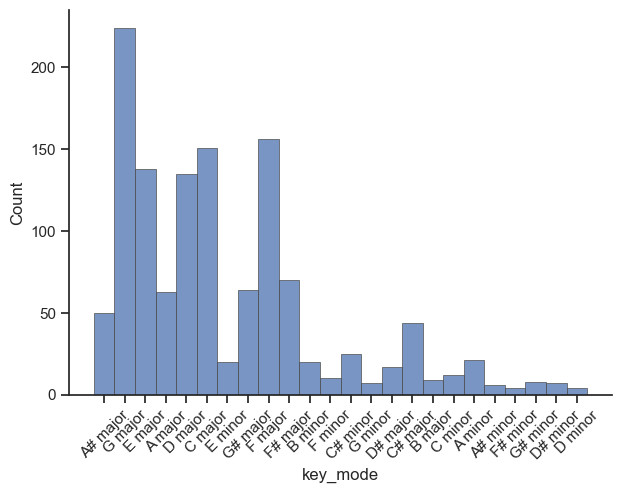

In [80]:
# Necesito organizar esta grafica para ordenar las tonalidades en escala chromatica y ver el registro que maneja TS
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    TaylorSwift,
    x="key_mode",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5
)

plt.xticks(rotation=45);

# Utilizando Funciones en MySQL

Utilizando el conector previamente creado para comunicarnos con nuestra base de datos mandaremos llamar una función definida dentro de MySQL para conocer el número de pistas que tiene alguno de sus albums. 

In [81]:
mydb = pymysql.connect(
    user="root",
    password="Salazar96.",
    host="localhost",
    port=int(3306),
    db='Taylor_Swift'
)

try:
    # Create a cursor object
    cursorInstance = mydb.cursor()                                  

    # SQL Query to invoke the UDF with parameter
    album = 'Midnights (3am Edition)'
    sqlQuery = "select taylor_swift.Count_Tracks('%s');" %album

    # Execute the SQL Query
    cursorInstance.execute(sqlQuery)

    # Fetch all the rows
    results = cursorInstance.fetchall()
    print("Number of tracks in album %s is:" %album)
    for result in results:
        print(result)     

except Exception as e:
    print("Exception occured:{}".format(e))

finally:
    cursorInstance.close()
    mydb.close()

Number of tracks in album Midnights (3am Edition) is:
(40,)


# Utilizando Procedimientos Almacenados (SP) en MySQL

Utilizaremos el conector PyMySQL para llamar un procedimiento almacenado en la base de datos de Taylor Swift para generar una vista que nos muestre el promedio de `Danceability`, `Energy` y `Loudness` de cada disco distinto de la cantante. 

In [82]:
mydb = pymysql.connect(
    user="root",
    password="Salazar96.",
    host="localhost",
    port=int(3306),
    db='Taylor_Swift'
)

try:
    # Cursor object creation
    cursorObject = mydb.cursor()                                    

    # Execute the sqlQuery
    cursorObject.execute("call Danceability()")

    # Print the result of the executed stored procedure
    result = cursorObject.fetchall()
    field_names = [i[0] for i in cursorObject.description]
    df = pd.DataFrame(result, columns=field_names)

except Exception as e:
    print("Exeception occured:{}".format(e))

finally:
    mydb.close()
    
df.head(10)

,album_name,mean_danceability,mean_energy,mean_loudness
0,Taylor Swift Karaoke: 1989 (Deluxe),0.6154375,0.69018750,-7.3383125
1,Taylor Swift Karaoke: 1989 (Deluxe Edition),0.6040000,0.70018750,-7.0111250
2,Taylor Swift Karaoke: 1989,0.6326923,0.71500000,-6.7816923
3,1989,0.6499487,0.69887179,-6.2367692
4,1989 (Deluxe Edition),0.6332941,0.66302941,-7.1452059
5,1989 (Deluxe),0.6332105,0.62484211,-7.9241053
6,folklore: the long pond studio sessions (from ...,0.5547353,0.37342647,-10.6126471
7,folklore (deluxe version),0.5480294,0.41561765,-10.3272059
8,folklore,0.5675938,0.42503125,-10.2448125
9,reputation (Big Machine Radio Release Special),0.6840323,0.42712903,-10.0680968


Utilizamos el DataFrame generado por el procedimiento almacenado en MySQL para realizar una visualización de la bailabilidad promedio por album.

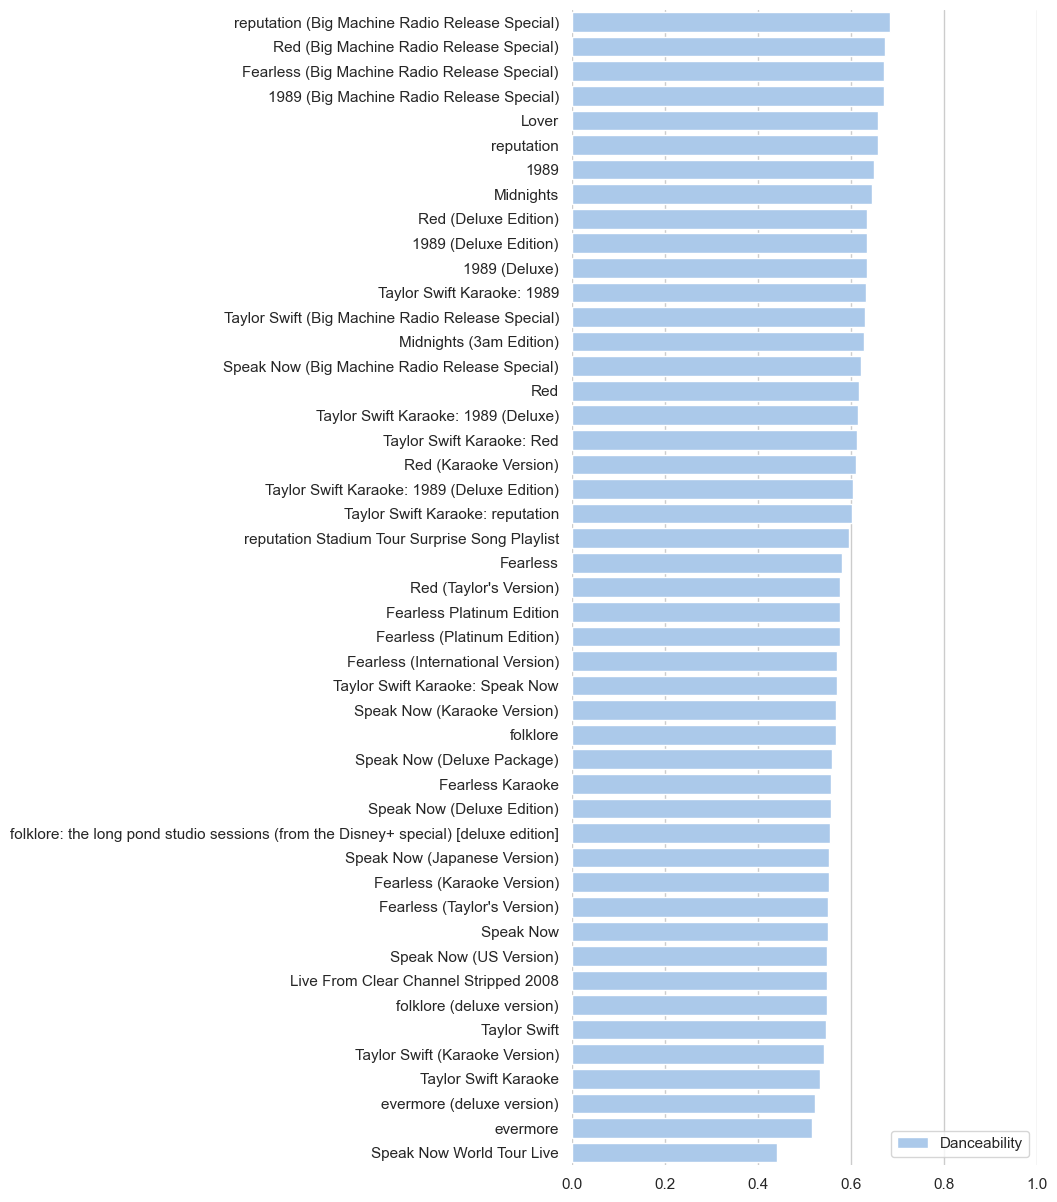

In [83]:
sns.set_theme(style="whitegrid")

df = df.sort_values(by="mean_danceability", ascending=False)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="mean_danceability", y="album_name", data=df,
            label="Danceability", color="b", orient="h")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="")
sns.despine(left=True, bottom=True)

# Referencias

* [Taylor Swift Data Base](https://www.kaggle.com/datasets/arthurboari/taylor-swift-spotify-data?resource=download)
* [Repositorio del Proyecto](https://github.com/osirisizs/Introduccion-a-la-Ciencia-de-Datos)
* [Convertidor de CSV a SQL](https://sqlizer.io/)